[link text](https:// [link text](https://))# Providing Data-driven Suggestions for HR**

This is an opportunity to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a fictional consulting firm.

Stages of workflow

- Plan
- Analyze
- Construct 
- Execute

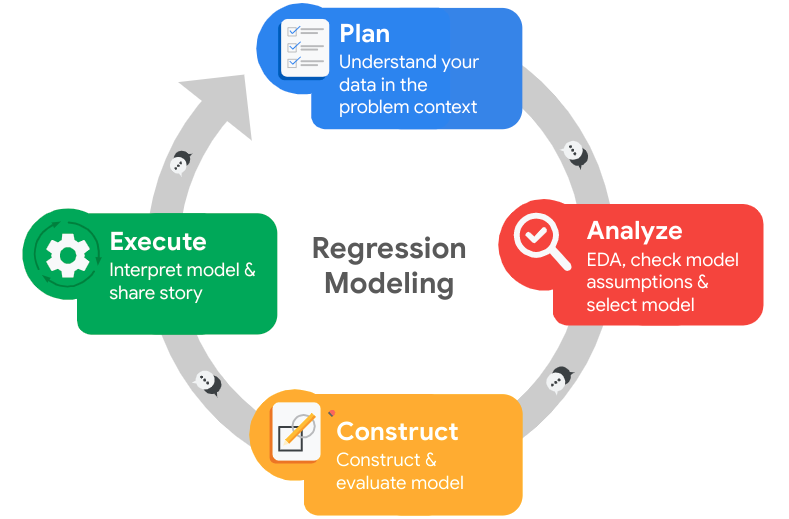



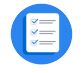  

# Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it may be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭 
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? 
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- Do you have any ethical considerations in this stage? 




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages
### YOUR CODE HERE ###
#data manipulations 
import pandas as pd
import numpy as np

#data visualizations
import matplotlib.pyplot as plt
import seaborn as sn

#statistics
import math

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression

#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Regulizations
from sklearn.linear_model import Ridge

### Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset into a dataframe
### YOUR CODE HERE ### 

filepath='/content/drive/MyDrive/Datasets/HR_dataset.csv'
df=pd.read_csv(filepath)

# Display first few rows of the dataframe
### YOUR CODE HERE ### 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df = df.reindex(columns=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary','left',])

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
### YOUR CODE HERE ### 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ### 
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
### YOUR CODE HERE ### 
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'left'],
      dtype='object')

In [ ]:
# Rename columns as needed
### YOUR CODE HERE ### 

# Convert the column names to snake_case
df = df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'))

# Make column names more concise
df = df.rename(columns={'satisfaction_level':'sat_level', 'last_evaluation':'last_eval', 'number_project':'n_projects',
       'average_montly_hours':'avg_monthly_hrs', 'time_spend_company':'tenure',
       'promotion_last_5years':'promo_5yrs','department':'dept'})

# Display all column names after the update
### YOUR CODE HERE ### 
df.columns

Index(['sat_level', 'last_eval', 'n_projects', 'avg_monthly_hrs', 'tenure',
       'work_accident', 'promo_5yrs', 'dept', 'salary', 'left'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
### YOUR CODE HERE ###
df.isna().sum()

sat_level          0
last_eval          0
n_projects         0
avg_monthly_hrs    0
tenure             0
work_accident      0
promo_5yrs         0
dept               0
salary             0
left               0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
### YOUR CODE HERE ###
print(f'Number of duplicates: {df.duplicated().sum()}')

Number of duplicates: 3008


In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
# Select the rows containing duplicates
duplicate_rows = df.loc[df.duplicated()]

# Inspect the duplicate rows
print(duplicate_rows.head())

      sat_level  last_eval  n_projects  avg_monthly_hrs  tenure  \
396        0.46       0.57           2              139       3   
866        0.41       0.46           2              128       3   
1317       0.37       0.51           2              127       3   
1368       0.41       0.52           2              132       3   
1461       0.42       0.53           2              142       3   

      work_accident  promo_5yrs        dept  salary  left  
396               0           0       sales     low     1  
866               0           0  accounting     low     1  
1317              0           0       sales  medium     1  
1368              0           0       RandD     low     1  
1461              0           0       sales     low     1  


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,sat_level,last_eval,n_projects,avg_monthly_hrs,tenure,work_accident,promo_5yrs,dept,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


### Check outliers

Check for outliers in the data.

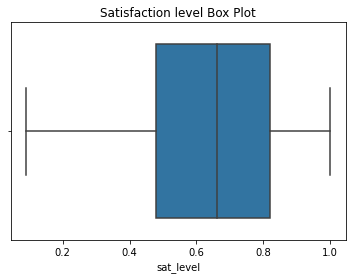

In [ ]:
# Create a boxplot to visualize outliers
### YOUR CODE HERE ###
# Create a figure and an Axes object
sn.boxplot(x=df["sat_level"])
plt.title('Satisfaction level Box Plot')
plt.show()

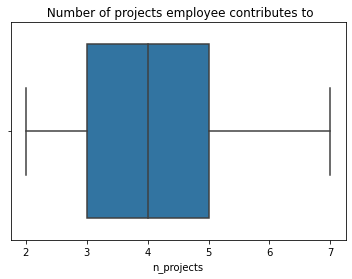

In [ ]:
# Create a boxplot to visualize outliers
### YOUR CODE HERE ###
# Check outliers on number of projects
plt.title(' Number of projects employee contributes to')
sn.boxplot(x=df["n_projects"])

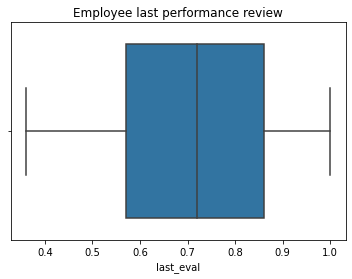

In [ ]:
# Create a boxplot to visualize outliers
### YOUR CODE HERE ###
# Check outliers on last evaluation of the employee
sn.boxplot(x=df["last_eval"])
plt.title('Employee last performance review')
plt.show()

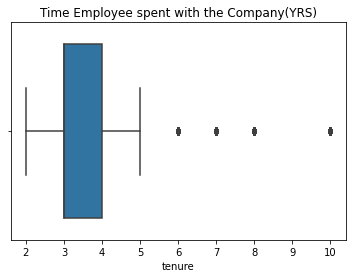

In [ ]:
# Create a boxplot to visualize outliers
### YOUR CODE HERE ###
# Check outliers on years of employee with the company
sn.boxplot(x=df["tenure"])
plt.title('Time Employee spent with the Company(YRS)')
plt.show()

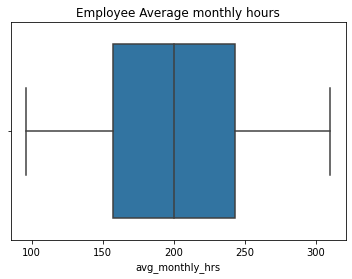

In [ ]:
# Create a boxplot to visualize outliers
### YOUR CODE HERE ###
# Check outliers on average monthly hours of employee
sn.boxplot(x=df["avg_monthly_hrs"])
plt.title('Employee Average monthly hours')
plt.show()

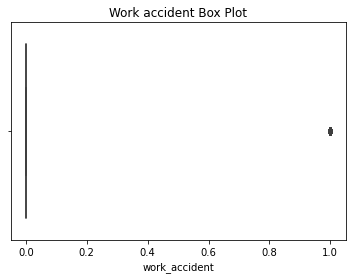

In [ ]:
# Create a boxplot to visualize outliers
### YOUR CODE HERE ###
# Create a box plot on employee work accidents
sn.boxplot(x=df["work_accident"])
plt.title('Work accident Box Plot')
plt.show()

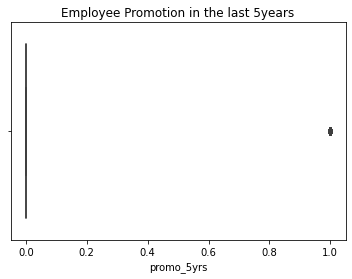

In [ ]:
# Create a boxplot to visualize outliers
### YOUR CODE HERE ###
# Create a box plot on employee prpmotion for last 5 years
sn.boxplot(x=df["promo_5yrs"])
plt.title('Employee Promotion in the last 5years')
plt.show()

In [ ]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###
# Calculate the quartiles
q1, q3 = df['tenure'].quantile([0.25, 0.75])

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the outlier threshold
threshold = 1.5 * iqr

# Define a function to check for outliers
def has_outlier(row):
    value = row['tenure']
    return value < q1 - threshold or value > q3 + threshold

# Apply the function to the DataFrame and count the number of rows containing outliers
n_outliers = df.apply(has_outlier, axis=1).sum()

print(f'Number of rows containing outliers: {n_outliers}')

# Select the rows containing outliers
outlier_rows = df.loc[df.apply(has_outlier, axis=1)]

outlier_rows.head()


Number of rows containing outliers: 824


,sat_level,last_eval,n_projects,avg_monthly_hrs,tenure,work_accident,promo_5yrs,dept,salary,left
1,0.80,0.86,5,262,6,0,0,sales,medium,1
17,0.78,0.99,4,255,6,0,0,sales,low,1
34,0.84,0.87,4,246,6,0,0,hr,low,1
47,0.57,0.70,3,273,6,0,0,support,low,1
67,0.90,0.98,4,264,6,0,0,product_mng,medium,1


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

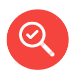
# Analyze Stage
- Perform EDA (analyze relationships between variables) 



💭 
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?

   

> > *There is positive correlation between dependent variable (Left) and the Independent variables (Last Evaluation, Number of Projects, average monthly hours and time spent with the company)*


- What do you observe about the distributions in the data? 

> 1. The employee time spent with the company(tenure) is distributed between 2 to 6 years. The highest frequency of the the time spent with the company is between 3 to 3.5 years.
> 2. Employees score on Last perfomance review is spread between 0.35 to 1. The highest frequency of the last perfomance score is between 0.5 to 0.55
> 3. Employees Average monthly hours is spread between 100 to 310. 
> 4. Number of projects employee ahs contribute are distributed between 2 and 7, and the frequency being between 3 to 4 number of projects


- What transformations did you make with your data? Why did you chose to make those decisions?
> Some of the data transforamation made on the data was 
>> - droping duplicates for data cleaning
>> - encoding, one hot ecoding for categorical variables since ML model work best with numerical variable as compared to categorical variables
>> - Scalling -To scales the features to a common range for best modeling result


- What are some purposes of EDA before constructing a predictive model?

> > - Identifying patterns and trends in the data
> > - EDA can help to identify and visualize outliers in the data, which can inform the decision on how to handle them in the modeling process.
> > - EDA can help to identify missing or invalid data, and can provide a sense of the overall quality of the data.
> > - EDA can help to determine the most appropriate modelling technique for the data

- Do you have any ethical considerations in this stage?
>> The dataset did not contain any critical ethical issue.



[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

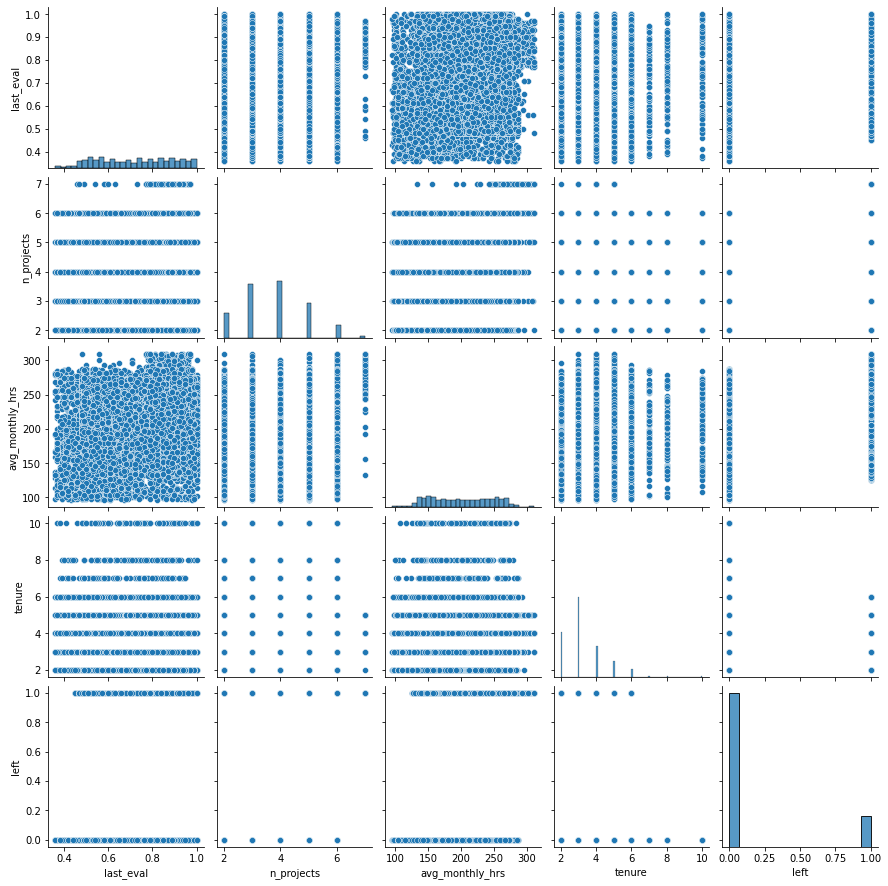

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
#Visualizing the relationships between variables in a dataset.
sn.pairplot(df[['last_eval','n_projects','avg_monthly_hrs','tenure','left']])
plt.show()

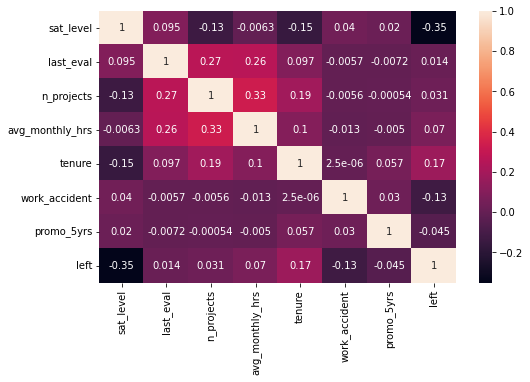

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
#Variables relationship
plt.figure(figsize=(8,5))
sn.heatmap(df.corr(),annot=True)
plt.show()

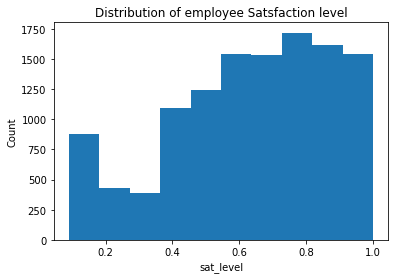

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
# #Visualizing data points
##Distribution emplyees satsfaction level
x = df['sat_level']
plt.hist(x)
plt.ylabel('Count')
plt.xlabel('sat_level')
plt.title('Distribution of employee Satsfaction level')
plt.show()

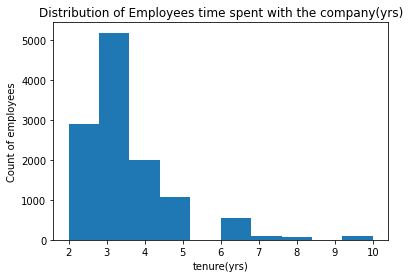

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
# #Visualizing data points
##Distribution of time spent with the compony
x = df['tenure']
plt.hist(x)
plt.ylabel('Count of employees')
plt.xlabel('tenure(yrs)')
plt.title('Distribution of Employees time spent with the company(yrs)')
plt.show()

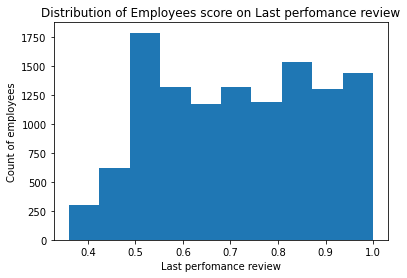

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
# #Visualizing data points
##Distribution of Last evaluation score
x = df['last_eval']
plt.hist(x)
plt.ylabel('Count of employees')
plt.xlabel('Last perfomance review')
plt.title('Distribution of Employees score on Last perfomance review')
plt.show()

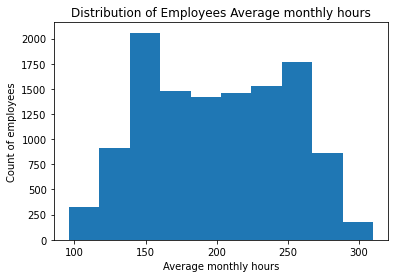

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
# #Visualizing data points
##Distribution of employee average monthly hours
x = df['avg_monthly_hrs']
plt.hist(x)
plt.ylabel('Count of employees')
plt.xlabel('Average monthly hours')
plt.title('Distribution of Employees Average monthly hours')
plt.show()

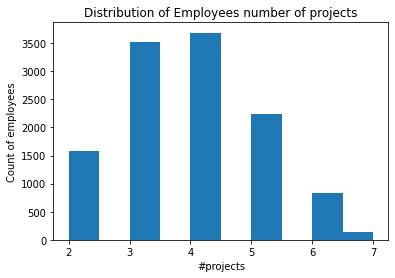

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
# #Visualizing data points
##Distribution of time spent with the compony
x = df['n_projects']
plt.hist(x)
plt.ylabel('Count of employees')
plt.xlabel('#projects')
plt.title('Distribution of Employees number of projects')
plt.show()

In [ ]:
#How many employess per department?
df['dept'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: dept, dtype: int64

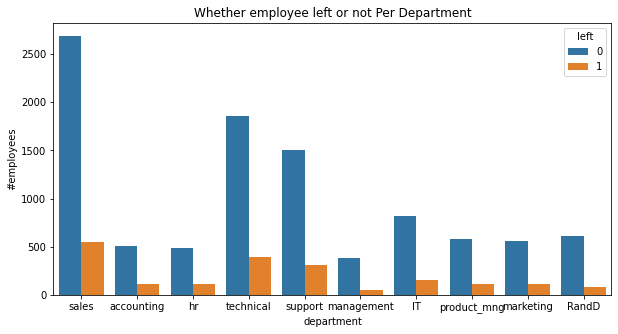

In [ ]:
#Visualizing employee who left and those who stays per department
plt.figure(figsize=(10, 5))
sn.countplot(data=df, x="dept", hue="left")
plt.ylabel('#employees')
plt.xlabel('department')
plt.title('Whether employee left or not Per Department')
plt.show()

Observation: Number of employee that lest the company is higher in the sales depertments compared to other departments

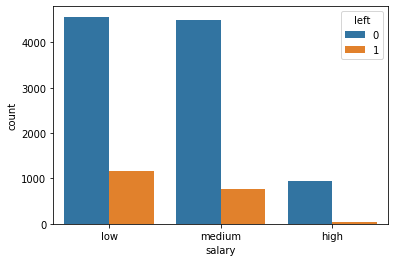

In [ ]:
#Visualizing employees who left and those who stays based on their salary level
sn.countplot(data=df, x="salary", hue="left")

Observarion: Employess with low salary left the company with high rate followed by those with medium salary.

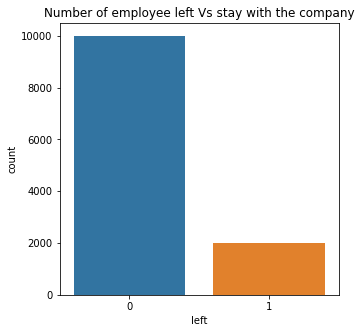

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
# #Comparison of whether employee left or not
plt.figure(figsize=(5, 5))
sn.countplot(x= "left", data = df)
plt.title('Number of employee left Vs stay with the company')
plt.show()

In [ ]:
#Display number of employees that left and those who stay with the company
left = df['left'].value_counts()
left

0    10000
1     1991
Name: left, dtype: int64

76% of employees stay while 23.8% left the company

In [ ]:
#displyaing the percentage of employee who left and those who stayed with the company
df['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

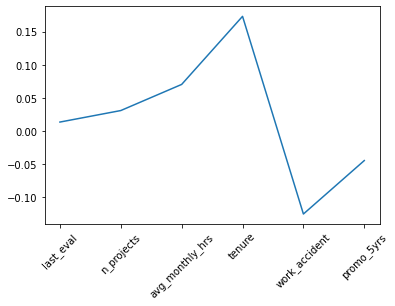

In [ ]:
#Visualizing correlation with other Variables
corr = df[df.columns[1:]].corr()['left'][:-1]
plt.plot(corr)
plt.xticks(rotation=45)
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

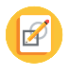
#Construct Stage
- Determine which models are most appropriate
- Construct the model 
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
##Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables 
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size 





💭 
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?

- Which independent variables did you choose for the model, and why?
>> Last Evaluation('last_eval), , average monthly hours and time spent with company(tenure). These variable were chosen because they had positive correlation with the depedent variable 'left'
- Are each of the assumptions met?
>> Yes, since the variance inflation factor of all independent variables was less than 10 which meand no critical multicollinearity among independent variables
- How well does your model fit the data?
>> The model fit well the data by the accuracy of 85%
- Can you improve it? Is there anything you would change about the model?
>> The model can be improved by several techniques such as Class balance, since there was class imbalance in the datasete for the dependent variable.

- Do you have any ethical considerations in this stage?
>> From the analysis no ethical issues have been observed.



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task for this data is Classification because the outcome variavle is Binary

### Identify the types of models most appropriate for this task.

Regression is most appropirate for this data because it is valuable for predicting the likelihood of an event. It helps determine the probabilities between any two classes

In [ ]:
# Step 1: one hot encode the categorical covariate dept
one_hot_product = pd.get_dummies(df['dept'], prefix='dept')

#Step 2: use pd.concat to join the new columns with your original dataframe
df = pd.concat([df, one_hot_product], axis=1)

#Stpe 3: now drop the original dept column (you don't need it anymore)
df.drop(['dept'], axis=1, inplace=True)

# Step 4: print the resultant dataframe
df.head()

,sat_level,last_eval,n_projects,avg_monthly_hrs,tenure,work_accident,promo_5yrs,salary,left,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,low,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,medium,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,low,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,low,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Step 1: one hot encode the categorical covariate salary
one_hot_product = pd.get_dummies(df['salary'], prefix='salary')

#Step 2: use pd.concat to join the new columns with your original dataframe
df = pd.concat([df, one_hot_product], axis=1)

#Stpe 3: now drop the original dept column (you don't need it anymore)
df.drop(['salary'], axis=1, inplace=True)

# Step 4: print the resultant dataframe
df.head()

,sat_level,last_eval,n_projects,avg_monthly_hrs,tenure,work_accident,promo_5yrs,left,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
### YOUR CODE HERE ###
# Isolate X and y
X = df[['sat_level','tenure','avg_monthly_hrs']]
y = df['left']

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Use the scaler to transform the data
X_scaled = scaler.transform(X)

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2,random_state=0)

In [ ]:
# Build a logistic regression model and fit the model to the training data
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000).fit(X_train,y_train)

In [ ]:
# Get coefficients from the model
model.coef_

array([[-0.85915164,  0.29717215,  0.10919333]])

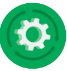
#Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



💭 
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
>> Time spent with the company and average monthly hours contributes to whether employee left or stay.
- What business recommendations do you propose based on the models built?
>> Its has observed from EDA the rate of employee with low salary left the company is higher compared to those with higher salary. Same applies to the rate of employee from sales depertment to leave the compony is higher compared to taht of other departments. I would recomend the company to motivate such groups with different incentives.

- What potential recommendations would you make to your manager/company?
>> Providing empoyees with long contract and standard monthly working hours plus good benefits will keep the employees.

- Do you think your model could be improved? Why or why not? How? 
>> Yes this model could be improved by applying techniques such as class balance, regularization and provide the model with enough dataset and enough/Apropriate features.

- What business recommendations do you propose based on the models built?
>> The company should consider duration of contract, average working hours per month during time of higher, and continously capacitating the team through perfomance apraisal and trainings by enagaging them during the perfomance review to understand area they may need improvement and support that they need.
>> Also since other depertment have low rate of employee left, the management can observe what keep them motivated and apply those techniques to the depertment with high number of left.

- Given what you know about the data and the models you were using, what other questions could you address for the team?
>> - What contributes to the satsafaction level of the employee?
>> - Does the salary contributes to the employee left or stay?
>> - Satsfaction level by department. 
- Do you have any ethical considerations in this stage?
>> No critical ethical issue were observed.



Double-click to enter your responses here.

##Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [ ]:
# Save predictions
y_pred = model.predict(X_test)

In [ ]:
# Print out predictions
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Use `predict_proba()` to get probability estimates
model.predict_proba(X_test)

array([[0.95792394, 0.04207606],
       [0.79889091, 0.20110909],
       [0.78253712, 0.21746288],
       ...,
       [0.95461273, 0.04538727],
       [0.87524521, 0.12475479],
       [0.8949964 , 0.1050036 ]])

✏
##Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example. 
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [ ]:
#Analyse result
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

Accuracy: 0.850354
Precision: 0.548780
Recall: 0.240000
F1 Score: 0.333952


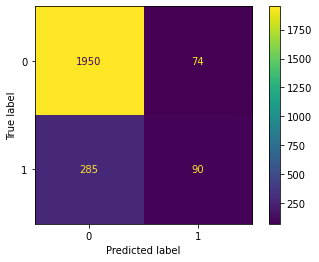

In [ ]:
# Produce a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
disp.plot()
plt.show()

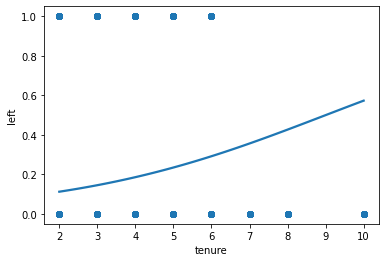

In [ ]:
# Create a regplot to visualize logistic relationship between `Time spent with the compony` and `left`
sn.regplot(x="tenure", y="left", data=df, logistic=True, ci=None);

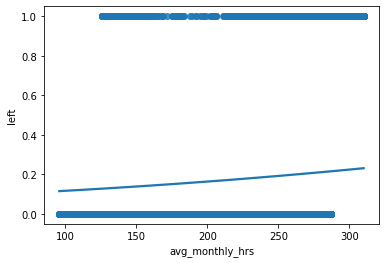

In [ ]:
# Create a regplot to visualize logistic relationship between `Average monthly hours` and `left`
sn.regplot(x="avg_monthly_hrs", y="left", data=df, logistic=True, ci=None);

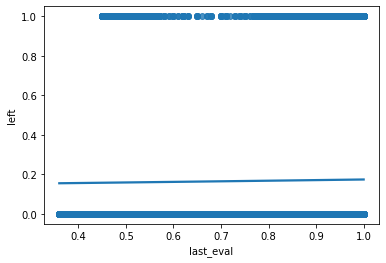

In [ ]:
# Create a regplot to visualize logistic relationship between `Last evaluation score` and `left`
sn.regplot(x="last_eval", y="left", data=df, logistic=True, ci=None);

In [ ]:
# Calculate the variance inflation factor (VIF) for each variable
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["feature"] = X.columns

# Print the VIF values
print(vif)

        VIF          feature
0  5.718496        sat_level
1  6.069735           tenure
2  9.585517  avg_monthly_hrs


### Summary of model results

[Double-click to enter your summary here.]

In [ ]:
# Produce a classification report
target_names = ["left", "stay"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        left       0.87      0.96      0.92      2024
        stay       0.55      0.24      0.33       375

    accuracy                           0.85      2399
   macro avg       0.71      0.60      0.62      2399
weighted avg       0.82      0.85      0.82      2399



### Conclusion, Recommendations, Next Steps
Conclusion
- This model can work well with the unseen  data of the same kind to predict whether the employee will left the company or not with the accuracy of 85%.
- The confusion matrix is useful as it displays a high amount of  amount of true positives. 

Recomendation and Next Step
> - Perfoming more EDA, feature engineering and Consider class balancing for the Independent (Y) variable to improve the accuracy of the model.
> - Provide the model with enough data and more features to examine if adding more independent variables leads to better results and better understanding of what factors lead to empoyee to stay.

